## Bootstrapping

An example of bootstrapping

In [28]:
import numpy as np
from scipy.stats._result_classes import PearsonRResult
from scipy import stats
import pandas as pd
from pandas import DataFrame
import seaborn

11
[71, 69]
[66, 62]


In [47]:
def calc_pcc(data: list[list[int, int]] , seed: np.array ) -> PearsonRResult:
    """ Pearson Coreration Coefficient """
    x = [data[i][0] for i in seed]
    y = [data[i][1] for i in seed]

    return stats.pearsonr(x, y)


In [51]:
# This 2 dimensional array represents the height in inches of brother and sister amon 11 families.
DATA = [
    [71, 69],
    [68, 64],
    [66, 65],
    [67, 63],
    [70, 65],
    [71, 62],
    [70, 65],
    [73, 64],
    [72, 66],
    [65, 59],
    [66, 62]
]
    
rounds = []

# Bootstrap the CC with 200 samples.
for i in range(0, 200, 1):
    seed = np.random.randint(1, 11, 11)
    cc = calc_pcc(DATA, seed)
    rounds.append([i+1, calc_pcc(DATA, seed).statistic])

rs: DataFrame = pd.DataFrame(
    np.array(rounds),
    columns=['round', 'pearson_cc'])


<Axes: xlabel='pearson_cc', ylabel='Count'>

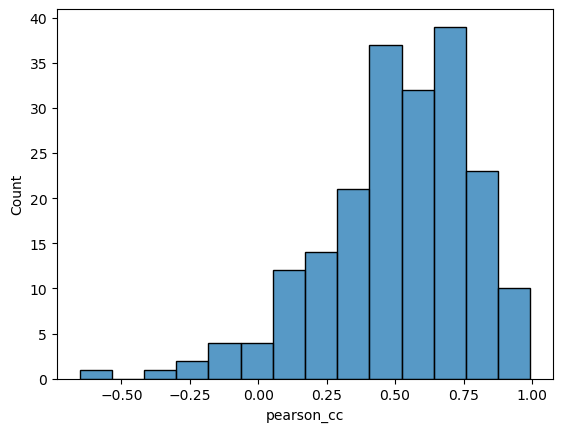

In [52]:
seaborn.histplot(rs,  x='pearson_cc')

You could see that corelation coefficient at **0.6** is likely to be most observed. 